In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
clmentbisaillon_fake_and_real_news_dataset_path = kagglehub.dataset_download('clmentbisaillon/fake-and-real-news-dataset')

print('Data source import complete.')


Data source import complete.


In [ ]:
import kagglehub
import shutil
import os

# Download latest version
path = kagglehub.dataset_download("clmentbisaillon/fake-and-real-news-dataset")

# Copier les fichiers vers /content/dataset
destination_dir = "/content/fake-and-real-news-dataset"
os.makedirs(destination_dir, exist_ok=True)
shutil.copytree(path, destination_dir, dirs_exist_ok=True)

# Afficher les fichiers copiés
for root, _, files in os.walk(destination_dir):
    for file in files:
        print(os.path.join(root, file))


print("Path to dataset files:", path)

/content/fake-and-real-news-dataset/True.csv
/content/fake-and-real-news-dataset/Fake.csv
Path to dataset files: /root/.cache/kagglehub/datasets/clmentbisaillon/fake-and-real-news-dataset/versions/1


Import Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import string
from sklearn.model_selection import train_test_split
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

Some utile Functions :

# Load Data:

In [ ]:
import pandas as pd

def load_data():
    # Load true news data
    true_df = pd.read_csv('/content/fake-and-real-news-dataset/True.csv')[['title', 'text']]

    # Load fake news data
    fake_df = pd.read_csv('/content/fake-and-real-news-dataset/Fake.csv')[['title', 'text']]

    # Label the data
    true_df['target'] = 0
    fake_df['target'] = 1

    true_df = true_df.drop_duplicates(subset=['title', 'text'])


    # Balance the dataset by sampling fake news
    fake_df = fake_df.sample(n=21197, random_state=42)  # Randomly sample 21,197 fake articles

    # Combine datasets and remove duplicates
    df = pd.concat([true_df, fake_df], axis=0)
    #df = df.drop_duplicates(subset=['title', 'text'])
    return df

# Usage
df = load_data()
print(df['target'].value_counts())  # Check the balance of classes


target
0    21197
1    21197
Name: count, dtype: int64


<ipython-input-11-dfa99d03f544>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fake_df['target'] = 1


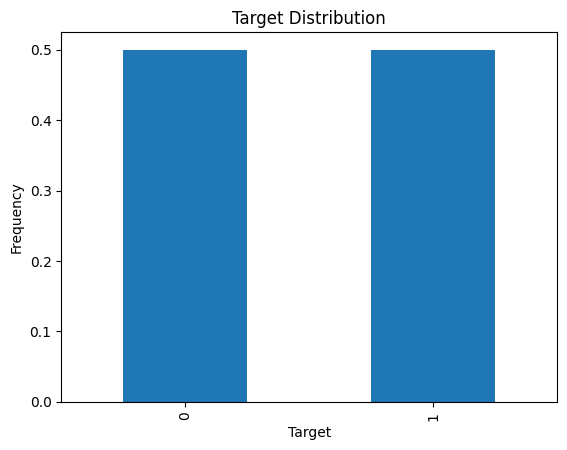

In [ ]:
def plot_distribution(df):
    df.target.value_counts(normalize=True).plot(kind='bar')
    plt.title('Target Distribution')
    plt.xlabel('Target')
    plt.ylabel('Frequency')
    plt.show()

plot_distribution(df)

# Preprocessing Data :

In [ ]:
def text_preprocessing(text):
    # Check if the input is a string; if not, convert it to an empty string
    if not isinstance(text, str):
        text = ''

    text = text.lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'<.*?>+', '', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation + "–—−±×÷"), '', text)
    text = re.sub(r'\n', '', text)
    text = re.sub(r'\w*\d\w*', '', text)
    text = re.sub(r'reuters', '', text)
    text = re.sub(r' +', ' ', text).strip()
    return text

def preprocess_data(df):
    df['title'] = df['title'].apply(text_preprocessing)
    df['text'] = df['text'].apply(text_preprocessing)
    df = df.sample(frac=1).reset_index(drop=True)
    return df


df = preprocess_data(df)

In [ ]:
print(df.head(), end = "\n\n")

                                               title  \
0  hillary dnc speech “we are going to follow the...   
1  fire this fox news analyst trump was “allegedl...   
2  watch rightwing pastor compares trump to jesus...   
3  us house freedom caucus chair healthcare bill ...   
4  judiciary committee senators wont consider oba...   

                                                text  target  
0  are you paying attention america a vote for hi...       1  
1  our previous reports on jehmu greenei will nev...       1  
2  these conservative christians are sickthrougho...       1  
3  washington the head of the us house freedom ca...       0  
4  washington republicans on the us senate judici...       0  



In [ ]:
df

,title,text,target
0,hillary dnc speech “we are going to follow the...,are you paying attention america a vote for hi...,1
1,fire this fox news analyst trump was “allegedl...,our previous reports on jehmu greenei will nev...,1
2,watch rightwing pastor compares trump to jesus...,these conservative christians are sickthrougho...,1
3,us house freedom caucus chair healthcare bill ...,washington the head of the us house freedom ca...,0
4,judiciary committee senators wont consider oba...,washington republicans on the us senate judici...,0
...,...,...,...
42389,president obama came out of retirement today t...,after two months of an administration that giv...,1
42390,karma racist west virginia official who called...,another racist just found out the hard way tha...,1
42391,british pm may appoints julian smith as chief ...,london british prime minister theresa may appo...,0
42392,obama commencement speech to black graduates y...,because getting something for nothing is all t...,1


In [ ]:
import os
from sklearn.model_selection import train_test_split

def split_and_save(df):
    # Create an output directory if it doesn't exist
    output_dir = '/content/data'
    os.makedirs(output_dir, exist_ok=True)

    # Split the dataset into train and test sets
    train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df['target'])

    # Save the datasets
    train_df.to_csv(os.path.join(output_dir, 'train.csv'), index=False)
    test_df.to_csv(os.path.join(output_dir, 'test.csv'), index=False)

    # Print dataset sizes
    print("Train dataset size: ", len(train_df))
    print("Test dataset size: ", len(test_df))
    print("Datasets saved to:", output_dir)

# Call the function
split_and_save(df)
print("News data preprocessing is done.")


Train dataset size:  33915
Test dataset size:  8479
Datasets saved to: /content/data
News data preprocessing is done.


In [ ]:
pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 15.7 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification, AutoModelForCausalLM, Trainer, TrainingArguments
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import pandas as pd
from datasets import Dataset
import os
import string
import re

# 0. GPU or CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using", device)

Using cuda


Use test/train data to Fine Tuning the Transformer :

In [ ]:
# 1. Load Dataset
def load_data(train_path, test_path):
    train_data = pd.read_csv(train_path, encoding='utf-8')
    test_data = pd.read_csv(test_path, encoding='utf-8')

    train_texts = train_data['text'].tolist()
    train_labels = train_data['target'].tolist()
    test_texts = test_data['text'].tolist()
    test_labels = test_data['target'].tolist()

    return train_texts, test_texts, train_labels, test_labels

In [ ]:
train_path='/content/data/train.csv'
test_path='/content/data/test.csv'

In [ ]:
# 7. Training Phase
train_texts, test_texts, train_labels, test_labels = load_data(train_path, test_path)

# Fine Tuning Transformers :

# Helpers

In [ ]:
# 3. Load Model and Tokenizer
def load_model_and_tokenizer(model_dir, model_class):
    model = model_class.from_pretrained(model_dir).to(device)
    tokenizer = AutoTokenizer.from_pretrained(model_dir)
    return model, tokenizer

In [ ]:
def tokenize_data(texts, tokenizer, max_length=512):
    if isinstance(texts, list):
        texts = [str(text) if text is not None else "" for text in texts]
    else:
        texts = str(texts) if texts is not None else ""

    return tokenizer(texts, padding='max_length', truncation=True, return_tensors="pt", max_length=max_length)

**Entraîner un modèle de classification de texte utilisant BERT (ou un autre modèle similaire comme RoBERTa) à l'aide de la bibliothèque Transformers de Hugging Face. Le but est d'entraîner un modèle de classification de séquences pour prédire des étiquettes à partir de textes**

Début de la formation du modèle BERT.
BERTLense is fine-tuned on roberta-base
Initialisation de BERTLense sur roberta-base


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Tokenisation des données d'entraînement et de test.
Création des datasets d'entraînement et de test.
Configuration des paramètres de formation.
Initialisation du Trainer.
Début de l'entraînement sur 1 époque(s).


Epoch,Training Loss,Validation Loss


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.000700,0.019670,0.995990,0.995990,0.995997,0.995990


Enregistrement du modèle et du tokenizer dans /content/model/bert_lense.
Prédictions sur les données de test.


Matrice de confusion :
[[4215   25]
 [   9 4230]]


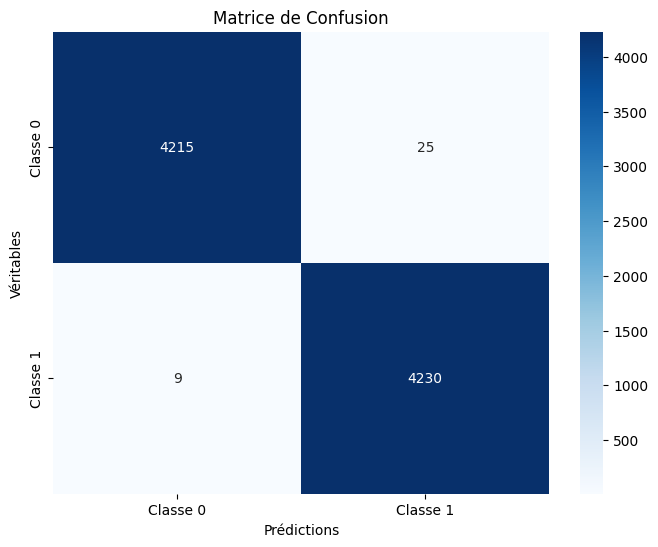

Formation terminée.


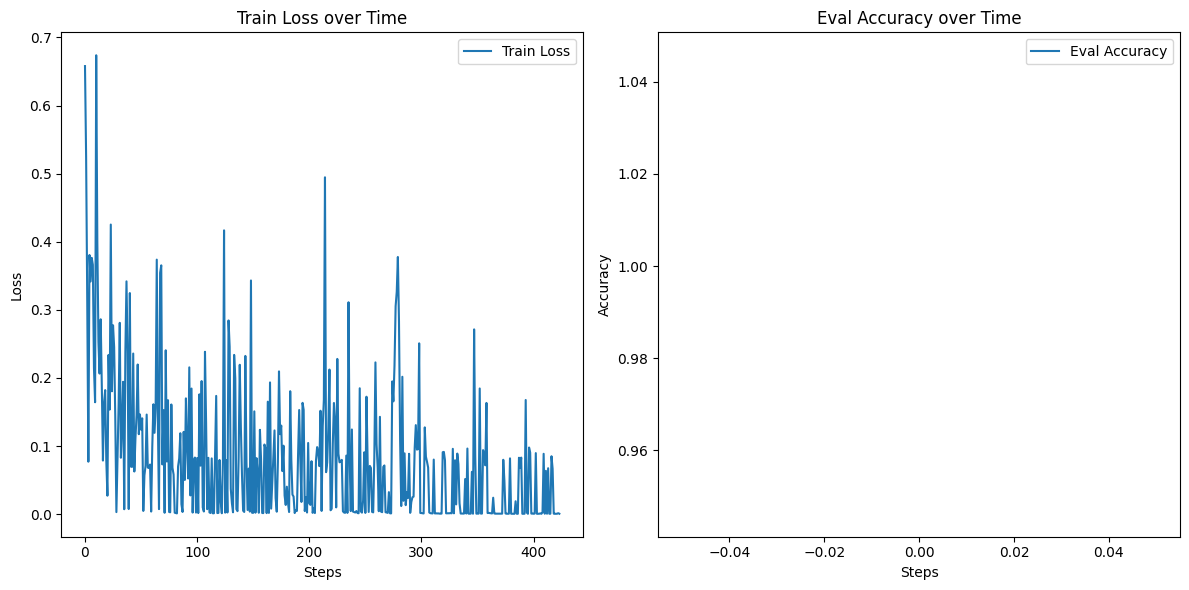

In [ ]:
import os
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
from sklearn.metrics import precision_recall_fscore_support, accuracy_score, confusion_matrix
import torch
from datasets import Dataset
import matplotlib.pyplot as plt
import seaborn as sns

def train_bert(llm_name, train_texts, train_labels, test_texts, test_labels, epochs, fine_tune=False, output_dir='/content/model/bert_lense'):
    print("Début de la formation du modèle BERT.")

    if fine_tune and os.path.exists(output_dir):
        print("Chargement du modèle et du tokenizer pour un fine-tuning.")
        model, tokenizer = load_model_and_tokenizer(output_dir, AutoModelForSequenceClassification)
        print("BERTLense is fine-tuned on BERTLense again")
    else:
        if llm_name is None:
            llm_name = 'roberta-base'
        print(f"BERTLense is fine-tuned on {llm_name}")
        print(f"Initialisation de BERTLense sur {llm_name}")
        tokenizer = AutoTokenizer.from_pretrained(llm_name)
        model = AutoModelForSequenceClassification.from_pretrained(llm_name, num_labels=2).to(device)

    print("Tokenisation des données d'entraînement et de test.")
    train_encodings = tokenize_data(train_texts, tokenizer)
    test_encodings = tokenize_data(test_texts, tokenizer)

    print("Création des datasets d'entraînement et de test.")

    train_dataset = Dataset.from_dict({
        'input_ids': train_encodings['input_ids'],
        'attention_mask': train_encodings['attention_mask'],
        'labels': torch.tensor(train_labels)
    })

    test_dataset = Dataset.from_dict({
        'input_ids': test_encodings['input_ids'],
        'attention_mask': test_encodings['attention_mask'],
        'labels': torch.tensor(test_labels)
    })

    print("Configuration des paramètres de formation.")
    training_args = TrainingArguments(
        output_dir=output_dir,
        num_train_epochs=epochs,
        per_device_train_batch_size=8,
        per_device_eval_batch_size=8,
        evaluation_strategy="epoch",
        save_strategy="epoch",
        logging_dir='./bert_logs',
        logging_steps=10,  # Log every 10 steps
        load_best_model_at_end=True,
        metric_for_best_model="accuracy",
        report_to="tensorboard",  # Enable TensorBoard reporting
        fp16=True
    )

    def compute_metrics(pred):
        labels = pred.label_ids
        preds = pred.predictions.argmax(-1)
        precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='weighted')
        acc = accuracy_score(labels, preds)
        return {
            'accuracy': acc,
            'f1': f1,
            'precision': precision,
            'recall': recall
        }

    print("Initialisation du Trainer.")
    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=train_dataset,
        eval_dataset=test_dataset,
        compute_metrics=compute_metrics,
    )

    print(f"Début de l'entraînement sur {epochs} époque(s).")
    trainer.train()

    print(f"Enregistrement du modèle et du tokenizer dans {output_dir}.")
    # Sauvegarde du modèle et du tokenizer
    trainer.save_model(output_dir)
    tokenizer.save_pretrained(output_dir)

    # Prédictions sur les données de test
    print("Prédictions sur les données de test.")
    predictions, labels, _ = trainer.predict(test_dataset)

    # Calcul de la matrice de confusion
    preds = predictions.argmax(axis=-1)
    cm = confusion_matrix(labels, preds)

    # Affichage de la matrice de confusion
    print("Matrice de confusion :")
    print(cm)

    # Visualisation de la matrice de confusion avec seaborn
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Classe 0", "Classe 1"], yticklabels=["Classe 0", "Classe 1"])
    plt.xlabel('Prédictions')
    plt.ylabel('Véritables')
    plt.title('Matrice de Confusion')
    plt.show()

    print("Formation terminée.")
    return trainer, model, tokenizer

def plot_loss_and_accuracy(log_dir):
    # Chargement des logs TensorBoard
    from tensorboard.backend.event_processing.event_accumulator import EventAccumulator

    event_acc = EventAccumulator(log_dir)
    event_acc.Reload()

    # Extraction des métriques 'loss' et 'accuracy'
    loss = [x.value for x in event_acc.Scalars('train/loss')]
    accuracy = [x.value for x in event_acc.Scalars('eval/accuracy')]

    # Tracé des courbes
    plt.figure(figsize=(12, 6))

    # Tracé de la perte
    plt.subplot(1, 2, 1)
    plt.plot(loss, label='Train Loss')
    plt.xlabel('Steps')
    plt.ylabel('Loss')
    plt.title('Train Loss over Time')
    plt.legend()

    # Tracé de l'exactitude
    plt.subplot(1, 2, 2)
    plt.plot(accuracy, label='Eval Accuracy')
    plt.xlabel('Steps')
    plt.ylabel('Accuracy')
    plt.title('Eval Accuracy over Time')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Exemple d'appel
trainer, model, tokenizer = train_bert(
    llm_name=None,
    train_texts=train_texts,  # Remplacez par vos données d'entraînement
    train_labels=train_labels,  # Remplacez par vos étiquettes d'entraînement
    test_texts=test_texts,  # Remplacez par vos données de test
    test_labels=test_labels,  # Remplacez par vos étiquettes de test
    epochs=1
)

# Tracer la perte et l'exactitude après l'entraînement
plot_loss_and_accuracy('./bert_logs')


In [ ]:
import os
from transformers import AutoTokenizer, AutoModelForCausalLM, TrainingArguments, Trainer
from datasets import Dataset

# 5. Train GPT-based model
def train_gpt(llm_name, train_texts, test_texts, epochs, fine_tune=False, output_dir='/content/model/gpt_lense'):
    print("Starting GPT training process.")

    # Check if fine-tuning an existing model
    if fine_tune and os.path.exists(output_dir):
        print(f"Loading model and tokenizer from {output_dir} for further fine-tuning.")
        model, tokenizer = load_model_and_tokenizer(output_dir, AutoModelForCausalLM)
        print("GPTLense is fine-tuned on GPTLense again.")
    else:
        if llm_name is None:
            llm_name = 'gpt2'
        print(f"Initializing tokenizer and model from pretrained: {llm_name}.")
        tokenizer = AutoTokenizer.from_pretrained(llm_name)
        tokenizer.pad_token = tokenizer.eos_token
        model = AutoModelForCausalLM.from_pretrained(llm_name).to(device)

    # Tokenize data
    print("Tokenizing training and testing data.")
    train_encodings = tokenize_data(train_texts, tokenizer)
    test_encodings = tokenize_data(test_texts, tokenizer)

    # Create datasets
    print("Creating training and testing datasets.")
    train_dataset = Dataset.from_dict({
        'input_ids': train_encodings['input_ids'],
        'attention_mask': train_encodings['attention_mask'],
        'labels': train_encodings['input_ids']
    })

    test_dataset = Dataset.from_dict({
        'input_ids': test_encodings['input_ids'],
        'attention_mask': test_encodings['attention_mask'],
        'labels': test_encodings['input_ids']
    })

    # Define training arguments
    print("Setting up training arguments.")
    training_args = TrainingArguments(
        output_dir=output_dir,
        num_train_epochs=epochs,
        per_device_train_batch_size=8,
        per_device_eval_batch_size=8,
        evaluation_strategy="epoch",
        save_strategy="epoch",
        learning_rate=5e-5,
        logging_dir='./gpt_logs',
        load_best_model_at_end=True,
        fp16=True
    )

    # Initialize Trainer
    print("Initializing the Trainer.")
    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=train_dataset,
        eval_dataset=test_dataset,
    )

    # Start training
    print("Starting the training process.")
    trainer.train()
    print("Training process completed.")

    # Save model and tokenizer
    print(f"Saving model and tokenizer to {output_dir}.")
    trainer.save_model(output_dir)
    tokenizer.save_pretrained(output_dir)
    print("Model and tokenizer saved successfully.")

    return trainer, model, tokenizer


In [ ]:
# 7-1. Train
gpt_trainer, gpt_lense, gpt_tokenizer = train_gpt('EleutherAI/gpt-neo-125M', train_texts, test_texts, 3)

Starting GPT training process.
Initializing tokenizer and model from pretrained: EleutherAI/gpt-neo-125M.


tokenizer_config.json:   0%|          | 0.00/727 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/357 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.01k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/526M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/119 [00:00<?, ?B/s]

Tokenizing training and testing data.
Creating training and testing datasets.
Setting up training arguments.
Initializing the Trainer.
Starting the training process.


wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Epoch,Training Loss,Validation Loss
1,2.365400,2.363275
2,2.281600,2.314851
3,2.175300,2.303364


There were missing keys in the checkpoint model loaded: ['lm_head.weight'].


Training process completed.
Saving model and tokenizer to /content/model/gpt_lense.
Model and tokenizer saved successfully.


In [31]:
for log in gpt_trainer.state.log_history:
    print(log)


{'loss': 2.7431, 'grad_norm': 1.7591472864151, 'learning_rate': 4.805031446540881e-05, 'epoch': 0.1179245283018868, 'step': 500}
{'loss': 2.532, 'grad_norm': 2.061919927597046, 'learning_rate': 4.608490566037736e-05, 'epoch': 0.2358490566037736, 'step': 1000}
{'loss': 2.4874, 'grad_norm': 1.8782002925872803, 'learning_rate': 4.411949685534592e-05, 'epoch': 0.35377358490566035, 'step': 1500}
{'loss': 2.4323, 'grad_norm': 2.091671943664551, 'learning_rate': 4.2154088050314466e-05, 'epoch': 0.4716981132075472, 'step': 2000}
{'loss': 2.429, 'grad_norm': 2.0596461296081543, 'learning_rate': 4.018867924528302e-05, 'epoch': 0.589622641509434, 'step': 2500}
{'loss': 2.3997, 'grad_norm': 1.6509016752243042, 'learning_rate': 3.8223270440251576e-05, 'epoch': 0.7075471698113207, 'step': 3000}
{'loss': 2.3846, 'grad_norm': 2.107642412185669, 'learning_rate': 3.6257861635220125e-05, 'epoch': 0.8254716981132075, 'step': 3500}
{'loss': 2.3654, 'grad_norm': 2.196838855743408, 'learning_rate': 3.4292452

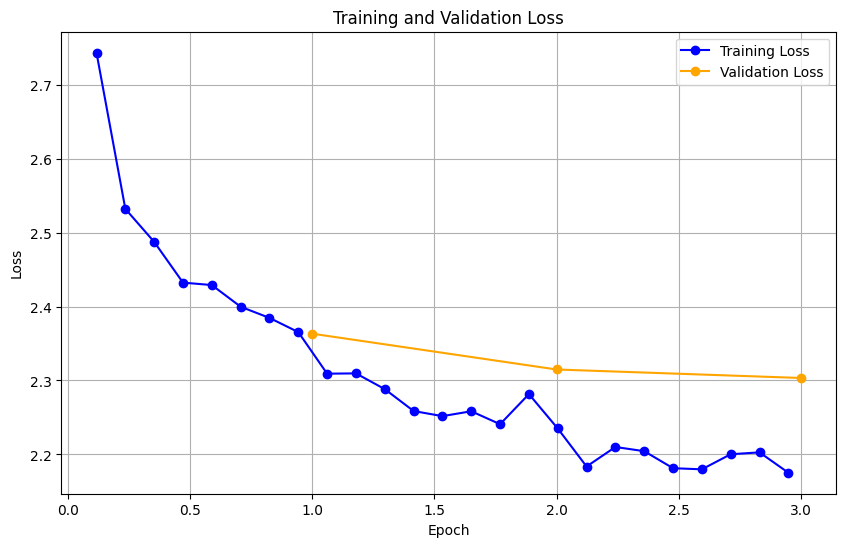

In [32]:
import matplotlib.pyplot as plt

def plot_training_logs(log_history):
    # Extraire les métriques
    train_epochs = []
    train_losses = []
    eval_epochs = []
    eval_losses = []

    for log in log_history:
        if 'loss' in log:
            train_epochs.append(log['epoch'])
            train_losses.append(log['loss'])
        if 'eval_loss' in log:
            eval_epochs.append(log['epoch'])
            eval_losses.append(log['eval_loss'])

    # Tracer les graphiques
    plt.figure(figsize=(10, 6))

    if train_losses:
        plt.plot(train_epochs, train_losses, label='Training Loss', marker='o', color='blue')
    if eval_losses:
        plt.plot(eval_epochs, eval_losses, label='Validation Loss', marker='o', color='orange')

    # Ajouter des labels, une légende et un titre
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.grid()
    plt.show()

# Appel de la fonction
plot_training_logs(gpt_trainer.state.log_history)


# 7. Detection Phase

In [27]:
# 3. Load Model and Tokenizer
def load_model_and_tokenizer(model_dir, model_class):
    model = model_class.from_pretrained(model_dir).to(device)
    tokenizer = AutoTokenizer.from_pretrained(model_dir)
    return model, tokenizer

In [28]:
# 6. Fake News Detection Model
def FakeLense(text, bert_model, bert_tokenizer, gpt_model, gpt_tokenizer, similarity_threshold=0.8):
    # Text preprocessing
    text = text_preprocessing(text)
    # BERT prediction
    bert_inputs = bert_tokenizer(text, return_tensors='pt', truncation=True, padding=True, max_length=512).to(device)
    bert_outputs = bert_model(input_ids=bert_inputs['input_ids'], attention_mask=bert_inputs['attention_mask'], output_hidden_states=True)
    bert_prediction = torch.argmax(bert_outputs.logits, dim=1).item()

    # GPT text generation
    #gpt_inputs = gpt_tokenizer.encode(text, return_tensors='pt', max_length=512, truncation=True).to(device)
    #gpt_outputs = gpt_model.generate(gpt_inputs, max_length=100)
    gpt_inputs = gpt_tokenizer.encode(text, return_tensors='pt', max_length=512, truncation=True).to(device)
    gpt_outputs = gpt_model.generate(gpt_inputs, max_length=100, pad_token_id=gpt_tokenizer.eos_token_id)
    generated_text = gpt_tokenizer.decode(gpt_outputs[0], skip_special_tokens=True)

    # BERT prediction on GPT-generated text
    generated_bert_inputs = bert_tokenizer(generated_text, return_tensors='pt', truncation=True, padding=True, max_length=512).to(device)
    generated_bert_outputs = bert_model(input_ids=generated_bert_inputs['input_ids'], attention_mask=generated_bert_inputs['attention_mask'], output_hidden_states=True)

    # Cosine similarity between original and generated text embeddings
    bert_embedding = bert_outputs.hidden_states[-1][:,0,:]  # [CLS] token embedding
    generated_bert_embedding = generated_bert_outputs.hidden_states[-1][:,0,:]
    similarity = torch.nn.functional.cosine_similarity(bert_embedding, generated_bert_embedding, dim=1).item()

    if bert_prediction == 1 or similarity < similarity_threshold:
        return "Fake News Detected."
    else:
        return "Real News Detected."

In [29]:
# Test Cases
test_texts = [
    # Truth News
   "In the wake of the recent election, residents of Amherst gathered at the local common for a peaceful vigil, expressing solidarity and resolve. The event, which took place at Edwards Church, drew a large crowd from across the community. Speakers addressed the need for unity and moving forward with strength. The atmosphere was one of reflection and hope, as people discussed the implications of the election results and what steps can be taken next.",
   "Long before Hillary Clinton, Victoria Woodhull was the first woman to run for president, setting a precedent nearly 150 years ago. Woodhull, a progressive activist, advocated for women's suffrage, civil rights, and free love. Her candidacy was groundbreaking, challenging the societal norms of the time. Today, Woodhull's legacy lives on as women continue to break barriers in politics and beyond, inspired by her pioneering efforts.",
   "The community was left in shock after the tragic death of FBI Special Agent David Raynor, who was found dead alongside his family in what authorities believe to be a murder-suicide. Raynor had been involved in several high-profile investigations, and his sudden death has raised many questions. Colleagues remember him as a dedicated officer who served with distinction. The investigation into the circumstances surrounding the incident continues.",

    # Fake News
   "Contrary to initial reports, new evidence suggests that Michael Brown was not the innocent victim portrayed by the media. Witnesses now reveal that Brown had attempted to flee the scene after robbing a store and was shot while struggling with Officer Darren Wilson. Despite these revelations, mainstream media outlets continue to push a narrative that fuels public outrage and division, ignoring the complexities of the case.",
   "In a shocking twist, FBI Special Agent David Raynor, who was reportedly investigating a connection between Hillary Clinton and a satanic pedophile ring, was found dead in his home. While official reports suggest a murder-suicide, conspiracy theorists claim that Raynor was silenced to protect powerful figures involved in the ring. The Clinton campaign has denied these allegations, dismissing them as baseless conspiracy theories.",
   "A former government insider has come forward with explosive claims that a secret plan is in place to control the population through implanted microchips. According to the whistleblower, these microchips will be introduced under the guise of health and security measures, but their true purpose is to monitor and manipulate citizens. The source alleges that this plan has been in development for years and involves coordination between governments and tech companies.",
]

In [30]:
# Detection Phase
bert_lense, bert_tokenizer = load_model_and_tokenizer('/content/model/bert_lense', AutoModelForSequenceClassification)
gpt_lense, gpt_tokenizer = load_model_and_tokenizer('/content/model/gpt_lense', AutoModelForCausalLM)

for i, text in enumerate(test_texts):
    result = FakeLense(text, bert_lense, bert_tokenizer, gpt_lense, gpt_tokenizer)
    print(f"News {i+1} : {result}\n")

The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


News 1 : Fake News Detected.

News 2 : Fake News Detected.

News 3 : Fake News Detected.

News 4 : Fake News Detected.

News 5 : Fake News Detected.

News 6 : Fake News Detected.



In [33]:
# Test Cases - 100
test_cases = [
    # Truth News
    "In the wake of the recent election, residents of Amherst gathered at the local common for a peaceful vigil, expressing solidarity and resolve. The event, which took place at Edwards Church, drew a large crowd from across the community. Speakers addressed the need for unity and moving forward with strength. The atmosphere was one of reflection and hope, as people discussed the implications of the election results and what steps can be taken next.",
    "The community was left in shock after the tragic death of FBI Special Agent David Raynor, who was found dead alongside his family in what authorities believe to be a murder-suicide. Raynor had been involved in several high-profile investigations, and his sudden death has raised many questions. Colleagues remember him as a dedicated officer who served with distinction. The investigation into the circumstances surrounding the incident continues.",
    "The European Union has announced a new initiative to plant three billion trees across the continent by 2030 as part of its Green Deal. The initiative aims to combat climate change, restore biodiversity, and enhance rural and urban landscapes. Environmentalists have praised the project, which involves close collaboration with local communities, governments, and private landowners to ensure the trees are planted in the most effective areas.",
    "A new public health campaign has been launched to encourage people to reduce their sugar intake. The campaign, led by the American Heart Association, highlights the link between high sugar consumption and chronic diseases such as diabetes and heart disease. The initiative includes guidelines for healthier eating habits and aims to raise awareness about the hidden sugars in processed foods.",
    "The Pentagon has recently announced a series of reforms aimed at improving the acquisition process for military technology. These reforms are intended to streamline the development and deployment of critical defense systems, ensuring that the U.S. military remains at the forefront of technological advancements. Experts believe that these changes will help the Department of Defense save both time and resources in future projects.",

    "The Kremlin has confirmed that Russian President Vladimir Putin and U.S. President Donald Trump will meet on the sidelines of an upcoming summit. The two leaders are expected to discuss a range of issues, including international security, trade, and the ongoing conflict in Syria. The meeting comes at a time of heightened tensions between the two countries, making it a crucial moment for diplomatic relations.",
    "In a bid to enforce federal immigration laws, the Texas House of Representatives has approved a bill targeting sanctuary cities. The bill, which has sparked intense debate, would require local law enforcement to cooperate with federal immigration authorities. Supporters of the bill argue that it is necessary to maintain public safety, while opponents believe it could lead to racial profiling and other civil rights abuses.",
    "The United Nations has launched a new initiative aimed at providing clean drinking water to remote areas in sub-Saharan Africa. The program, which is being implemented in partnership with local governments, will focus on building infrastructure and training communities to maintain water sources. This effort is expected to benefit millions of people who currently lack access to safe water.",
    "NASA has announced a new mission to explore one of Jupiter's moons, Europa, which is believed to have a subsurface ocean beneath its icy crust. The mission, set to launch in the next few years, aims to investigate the potential for life on the moon and gather data that could provide insights into the origins of life in our solar system. Scientists are particularly excited about the possibility of discovering microbial life in Europa's ocean.",
    "A recent report from the World Health Organization highlights the significant progress made in the fight against malaria. The report shows that malaria deaths have been reduced by half in the past two decades, thanks to increased access to bed nets, insecticides, and antimalarial drugs. While challenges remain, the WHO is optimistic that continued efforts could lead to the eventual eradication of the disease.",

    "A new initiative in New York City is providing free mental health counseling to residents struggling with anxiety and depression. The program, funded by the city government, aims to address the growing mental health crisis exacerbated by the COVID-19 pandemic. Licensed therapists are available to provide counseling both in-person and online, making the service accessible to all residents.",
    "The United Nations has declared the eradication of a deadly disease in Africa after decades of international efforts. The disease, which once claimed millions of lives annually, has been eliminated thanks to widespread vaccination campaigns and improved public health measures. This milestone is being celebrated as a major victory for global health and a testament to the power of international cooperation.",
    "A new law passed in California aims to reduce plastic waste by banning single-use plastic bags statewide. The law, which goes into effect next year, requires retailers to offer reusable or paper bags instead. Environmental groups have praised the move as a critical step towards reducing ocean pollution and protecting marine life. Businesses are adapting to the change by promoting eco-friendly alternatives.",
    "Researchers at MIT have developed a new type of battery that could revolutionize the renewable energy industry. The battery, which is made from abundant and inexpensive materials, has the potential to store large amounts of energy for long periods, making it ideal for use in solar and wind power systems. If commercialized, this technology could significantly reduce the cost of renewable energy and accelerate the transition to a sustainable energy future.",
    "A team of archaeologists has uncovered a hidden chamber in the Great Pyramid of Giza, revealing new insights into ancient Egyptian engineering. The chamber, located deep within the pyramid, contains artifacts and inscriptions that have never been seen before. This discovery is shedding light on the construction methods used by the ancient Egyptians and is expected to lead to further research into the mysteries of the pyramids.",


    # Fake News
   "Contrary to initial reports, new evidence suggests that Michael Brown was not the innocent victim portrayed by the media. Witnesses now reveal that Brown had attempted to flee the scene after robbing a store and was shot while struggling with Officer Darren Wilson. Despite these revelations, mainstream media outlets continue to push a narrative that fuels public outrage and division, ignoring the complexities of the case.",
   "In a shocking twist, FBI Special Agent David Raynor, who was reportedly investigating a connection between Hillary Clinton and a satanic pedophile ring, was found dead in his home. While official reports suggest a murder-suicide, conspiracy theorists claim that Raynor was silenced to protect powerful figures involved in the ring. The Clinton campaign has denied these allegations, dismissing them as baseless conspiracy theories.",
   "A former government insider has come forward with explosive claims that a secret plan is in place to control the population through implanted microchips. According to the whistleblower, these microchips will be introduced under the guise of health and security measures, but their true purpose is to monitor and manipulate citizens. The source alleges that this plan has been in development for years and involves coordination between governments and tech companies.",
   "A viral social media post claims that a new law requires all citizens to install government-approved cameras in their homes by the end of the year. The post alleges that these cameras will be used to monitor personal activities and report any suspicious behavior to authorities. Government officials have debunked this claim, confirming that no such law exists and urging the public to verify information before sharing it online.",
   "A widely shared online article claims that scientists have discovered a hidden continent beneath Antarctica, filled with ancient civilizations and advanced technologies. The article suggests that world governments are keeping this discovery a secret to prevent panic and to control access to the powerful technologies found there. Experts have dismissed these claims as pure fiction, with no scientific evidence to support such a discovery.",

   "Donald Trump just promised that under his administration, torture methods would be worse than ever before. In a recent interview, he suggested that waterboarding is just the beginning and that he plans to implement even more extreme measures to extract information from suspected terrorists. This statement has caused outrage among human rights organizations, who argue that such actions would violate international law.",
   "New research claims that MMR vaccines are linked to an increased risk of autism in children. The study, which has been widely criticized by the medical community, suggests that the combination of the measles, mumps, and rubella vaccines can trigger developmental disorders in a small percentage of children. Despite the lack of credible evidence, this claim has reignited the debate over vaccine safety.",
   "Conspiracy theorists are once again in the spotlight after a new claim that a group of elites is planning to use 5G technology to control the population. According to these theories, the widespread implementation of 5G networks will allow governments to monitor and manipulate citizens' behavior. Scientists and technology experts have repeatedly debunked these claims, stating that 5G poses no such risks.",
   "A viral social media post alleges that the United Nations is secretly planning to take over the world by enforcing a global government. The post claims that the UN's Sustainable Development Goals are a cover for a plot to strip nations of their sovereignty and impose a one-world government. Experts have dismissed these allegations as baseless and have reiterated that the UN's goals are aimed at promoting peace and development worldwide.",
   "A viral video has surfaced claiming that the COVID-19 vaccines contain microchips that are used to track and control people. The video, which has been widely shared on social media, alleges that the microchips are part of a global conspiracy to monitor individuals' movements. Health experts have repeatedly debunked these claims, emphasizing that the vaccines are safe and do not contain any such devices.",

   "In an unexpected turn of events, a whistleblower has come forward with documents alleging that the U.S. government has been secretly communicating with extraterrestrial beings for decades. The whistleblower claims that these interactions have been kept hidden from the public, and that the government has been working with the aliens on advanced technologies. The government has denied these allegations, calling them a hoax.",
   "A new conspiracy theory has emerged, suggesting that the wildfires in California were deliberately started by powerful elites as part of a land grab scheme. According to this theory, the fires were set to clear out land for new developments, with the goal of profiting from the destruction. Authorities have dismissed these claims, attributing the fires to a combination of extreme weather conditions and human error.",
   "Reports are circulating that a secret society is controlling world events from behind the scenes, manipulating governments, economies, and even natural disasters to achieve their goals. The society, allegedly composed of the world's richest and most powerful individuals, is said to be orchestrating a new world order. Experts have debunked these claims as baseless conspiracy theories with no factual evidence.",
   "A viral post claims that drinking a special herbal tea can cure cancer, but medical professionals warn that there is no scientific evidence to support this claim. The post suggests that the tea, made from a blend of rare herbs, can eliminate cancer cells without the need for chemotherapy or radiation. Oncologists stress that patients should follow proven treatments and consult their doctors before trying alternative remedies.",
   "A viral conspiracy theory claims that the recent power outage in Texas was deliberately engineered by the federal government to punish the state for its political leanings. According to the theory, the government used secret technology to cause the outage, which left millions without electricity during a winter storm. Officials have repeatedly denied these allegations, stating that the outage was caused by a combination of extreme weather and infrastructure failures.",

   "In a bizarre claim, a self-proclaimed psychic has predicted that a massive asteroid will strike Earth next year, causing widespread destruction. The psychic, who has gained a large following on social media, claims to have seen visions of the impact and warns that world governments are hiding the truth. Scientists have debunked the prediction, confirming that there are no known asteroids on a collision course with Earth.",
   "A fringe group has spread rumors that the moon landing was faked by NASA as part of a Cold War propaganda effort. The group claims that the entire event was staged in a Hollywood studio, and that the astronauts never actually set foot on the moon. Despite overwhelming evidence to the contrary, the theory continues to attract attention online, fueling doubts about one of humanity's greatest achievements.",
   "A social media post has gone viral claiming that a new wonder drug can cure all forms of cancer within days. The post alleges that the drug, which is being suppressed by pharmaceutical companies, is a natural remedy with no side effects. Medical experts have condemned the post as dangerous misinformation, urging people to rely on proven medical treatments rather than unverified miracle cures.",
   "A fabricated news report has claimed that the government is planning to enforce mandatory vaccinations for all citizens, regardless of medical conditions or religious beliefs. The report, which has been widely shared, suggests that those who refuse will be imprisoned. Public health officials have strongly refuted these claims, emphasizing that vaccination policies prioritize personal choice and public health safety.",
   "A new conspiracy theory claims that the recent surge in wildfires across the globe is actually part of a coordinated effort by governments to depopulate rural areas. According to this theory, the fires are being intentionally set to force people to move to urban centers where they can be more easily controlled. Authorities have dismissed these claims as baseless and emphasized that the fires are the result of climate change and human negligence.",
   "A viral hoax has emerged online, claiming that the COVID-19 vaccines are part of a plot to alter human DNA and create a new hybrid species. The hoax, which has been widely debunked by scientists, alleges that the vaccines contain genetic material that will permanently change the human genome. Experts have reiterated that the vaccines are safe and do not have any such effects on human DNA.",
   "A fabricated news story has spread on social media, alleging that a popular fast-food chain has been using lab-grown meat that is actually derived from human cells. The story claims that the company has been secretly growing human tissue in labs to produce its burgers, leading to widespread outrage. Health inspectors and company representatives have categorically denied these allegations, calling them completely unfounded and sensationalized.",
    ]

In [34]:
# 7. Detection Phase
bert_lense, bert_tokenizer = load_model_and_tokenizer('/content/model/bert_lense', AutoModelForSequenceClassification)
gpt_lense, gpt_tokenizer = load_model_and_tokenizer('/content/model/gpt_lense', AutoModelForCausalLM)

# Real / Fake count
real_count = 0
fake_count = 0
for i, text in enumerate(test_cases):
    result = FakeLense(text, bert_lense, bert_tokenizer, gpt_lense, gpt_tokenizer)
    if i < 15:
        if result == "Real News Detected.":
            real_count += 1
    else:
        if result == "Fake News Detected.":
            fake_count += 1
    print(f"News {i+1} : {result}\n")

print("Real Acc count : ", real_count)
print("Fake Acc count : ", fake_count)

News 1 : Fake News Detected.

News 2 : Fake News Detected.

News 3 : Real News Detected.

News 4 : Fake News Detected.

News 5 : Fake News Detected.

News 6 : Real News Detected.

News 7 : Fake News Detected.

News 8 : Real News Detected.

News 9 : Real News Detected.

News 10 : Fake News Detected.

News 11 : Fake News Detected.

News 12 : Fake News Detected.

News 13 : Real News Detected.

News 14 : Fake News Detected.

News 15 : Fake News Detected.

News 16 : Fake News Detected.

News 17 : Fake News Detected.

News 18 : Fake News Detected.

News 19 : Fake News Detected.

News 20 : Fake News Detected.

News 21 : Fake News Detected.

News 22 : Fake News Detected.

News 23 : Fake News Detected.

News 24 : Fake News Detected.

News 25 : Fake News Detected.

News 26 : Fake News Detected.

News 27 : Fake News Detected.

News 28 : Fake News Detected.

News 29 : Fake News Detected.

News 30 : Fake News Detected.

News 31 : Fake News Detected.

News 32 : Fake News Detected.

News 33 : Fake Ne